In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import subprocess
from pathlib import Path

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [ ]:
df_nsclc = pd.read_csv("NSCLC Radiomics Lung1.clinical-version3-Oct 2019.csv")

In [ ]:
df_nsclc.columns

Calculate the proportion where the patient is NOT dead at the end of trial:

In [ ]:
1-df_nsclc['deadstatus.event'].mean()

Weird values for T:

In [ ]:
df_nsclc[df_nsclc['clinical.T.Stage']>4]

In [ ]:
df_nsclc[df_nsclc['Overall.Stage'].isna()]

Impute this value: overall.stage should be IIIa

In [ ]:
df_nsclc_clean = df_nsclc.copy()

In [ ]:
df_nsclc_clean['Overall.Stage'].fillna('IIIa', inplace=True)

In [ ]:
df_nsclc_clean[df_nsclc_clean['Overall.Stage'].isna()]

In [ ]:
df_nsclc_clean[df_nsclc_clean['gender'].isna()]

In [ ]:
df_nsclc_clean[df_nsclc_clean['Survival.time'].isna()]

In [ ]:
df_nsclc_clean[df_nsclc_clean['age'].isna()]

In [ ]:
df_nsclc_clean = pd.get_dummies(data = df_nsclc_clean, columns=['gender'], drop_first=True)

In [ ]:
df_nsclc_clean.head()

In [ ]:
df_nsclc_clean['gender_male'].mean()

In [ ]:
df_nsclc_clean[df_nsclc_clean['deadstatus.event']==0].describe()

In [ ]:
df_nsclc_clean[df_nsclc_clean['deadstatus.event']==0]['Survival.time'].plot(kind='hist')

In [ ]:
df_nsclc_clean['PatientID'].unique()

In [ ]:
from lifelines import KaplanMeierFitter

In [ ]:
# Trying out KM plotter
kmf = KaplanMeierFitter()

kmf.fit(df_nsclc_clean['Survival.time'], df_nsclc_clean['deadstatus.event'])
kmf.plot()

In [ ]:
df_nsclc_clean['Histology'].unique()

In [ ]:
df_surv_lc = df_nsclc_clean[df_nsclc_clean['Histology']=='large cell']
df_surv_sc = df_nsclc_clean[df_nsclc_clean['Histology']=='squamous cell carcinoma']
df_surv_ad = df_nsclc_clean[df_nsclc_clean['Histology']=='adenocarcinoma']
df_surv_nos = df_nsclc_clean[df_nsclc_clean['Histology']=='nos']

In [ ]:
plt.figure(figsize=(10,7))

kmf.fit(df_surv_lc[df_surv_lc['gender_male']==1]['Survival.time'], df_surv_lc[df_surv_lc['gender_male']==1]['deadstatus.event'], label='Male')
ax1 = kmf.plot()

kmf.fit(df_surv_lc[df_surv_lc['gender_male']==0]['Survival.time'], df_surv_lc[df_surv_lc['gender_male']==0]['deadstatus.event'], label='Female')
kmf.plot(ax=ax1)

In [ ]:
plt.figure(figsize=(10,7))

# Stage III
bool_stage3 = df_nsclc_clean['Overall.Stage'].str.contains('III')
print(df_nsclc_clean[bool_stage3].shape)
# Stage I
bool_stage1 = df_nsclc_clean['Overall.Stage']=='I'
print(df_nsclc_clean[bool_stage1].shape)

kmf.fit(df_nsclc_clean[bool_stage3]['Survival.time'], df_nsclc_clean[bool_stage3]['deadstatus.event'], label='Stage III')
ax1 = kmf.plot()

kmf.fit(df_nsclc_clean[bool_stage1]['Survival.time'], df_nsclc_clean[bool_stage1]['deadstatus.event'], label='Stage I')
kmf.plot(ax=ax1)

---

In [ ]:
os.chdir('/Users/herve/Documents/BrainStation Data Science/Capstone')
df_features_test = pd.read_csv('Table.csv', index_col = 0)

In [ ]:
df_features_test.head()

In [ ]:
df_features_test['Feature Class'].unique()

We probably only need 'shape', 'gldm', 'glcm', 'firstorder', 'glrlm', 'glszm', and 'ngtdm'

In [ ]:
needed_features = ['shape', 'gldm', 'glcm', 'firstorder', 'glrlm', 'glszm', 'ngtdm']

In [ ]:
gtv_columns = df_features_test.columns[df_features_test.columns.str.contains('gtv', case=False)]
df_features_col = ['Feature Class', 'Feature Name']
df_features_col.extend(gtv_columns)

df_features_col

In [ ]:
df_feat_test_short = df_features_test[df_features_col]

In [ ]:
mask_feat = df_feat_test_short['Feature Class'].isin(needed_features)
features = df_feat_test_short[mask_feat]['Feature Class'].unique()

In [ ]:
df_feat_short = df_feat_test_short[df_feat_test_short['Feature Class'].isin(needed_features)]

In [ ]:
df_trans = df_feat_short.transpose()
display(df_trans)

In [ ]:
# Add a column called structure (GTV name)
# Then add a column called patient
df_trans = df_trans.rename(index={'Feature Name': 'Structure Name'})
df_trans.drop(index='Feature Class', inplace=True)
display(df_trans)
df_trans.index

In [ ]:
df_trans.columns = df_trans.iloc[0, 0:]

In [ ]:
df_trans.drop('Structure Name', axis=0, inplace=True)
display(df_trans)

In [ ]:
# Define what PatientID first before running the code!
PatientID = 'TEST'
fill_pxcol = [PatientID]*len(gtv_columns)
df_trans.insert(loc = 0, column='Patient ID', value=fill_pxcol)

In [ ]:
display(df_trans)

---

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import subprocess
from pathlib import Path

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [40]:
root='/Volumes/Time Machine Backups/Radiomics-NSCLC-v3-analysis'
dirlist = [ item for item in os.listdir(root) if os.path.isdir(os.path.join(root, item)) ]

In [41]:
# Then run a loop
os.chdir(root)
print(f'Current directory: {os.getcwd()}')

df_nsclc = pd.read_csv("NSCLC Radiomics Lung1.clinical-version3-Oct 2019.csv")

df_list = []
# Needed features for analysis
needed_features = ['shape', 'gldm', 'glcm', 'firstorder', 'glrlm', 'glszm', 'ngtdm']

max_num_GTVs = 0

for dirname in dirlist:
    # Reading the CSV file in a specific folder
    folder_name = dirname + '/Table.csv'
    df_features_test = pd.read_csv( folder_name, index_col = 0 )
    
    # Only selecting results from the GTVs (i.e. excluding OARs)
    gtv_columns = df_features_test.columns[df_features_test.columns.str.contains('gtv', case=False)]
    
    # And include the feature names too
    df_features_col = ['Feature Class', 'Feature Name']
    df_features_col.extend(gtv_columns)
    df_feat_test_short = df_features_test[df_features_col]

    # Only include the feature classes that are useful
    # (i.e. winnowing out version information, position, etc.)
    df_feat_short = df_feat_test_short[df_feat_test_short['Feature Class'].isin(needed_features)]
    
#    # Merge Feature Class and Feature Name
#    df_feat_short['Merged Feature Name'] = df_feat_short['Feature Class'] + '_' + df_feat_short['Feature Name']

    # Switching the rwos and columns for easier task of appending
    df_trans = df_feat_short.transpose()
    df_trans.drop(index='Feature Class', inplace=True)
    df_trans.columns = df_trans.iloc[0, 0:]
    df_trans.drop('Feature Name', axis=0, inplace=True)
    
    # Store the maximum number of GTVs out of all patients (for zero padding later on)
    if (df_trans.shape[0] > max_num_GTVs) :
        max_num_GTVs = df_trans.shape[0]
    
    # Store as a list of dataframes
    df_list.append(df_trans)

Current directory: /Volumes/Time Machine Backups/Radiomics-NSCLC-v3-analysis


In [42]:
max_num_GTVs

7

In [43]:
df_list_padded = []

for df in df_list:
    columns = df.columns
    df_temp_list = []
    
    for i in range(max_num_GTVs):
        if (i < df.shape[0]):
            series = df.iloc[i]
            df_temp = pd.DataFrame(series.values.astype(float), index = columns + '_' + str(i))
            df_temp_list.append(df_temp.transpose())
        else:
            series = np.zeros(len(columns))
            df_temp = pd.DataFrame(series, index = columns + '_' + str(i))
            df_temp_list.append(df_temp.transpose())
            
    df_list_padded.append( pd.concat(df_temp_list, axis=1) )

In [44]:
# And concat
df_grand = pd.concat(df_list_padded, keys=dirlist)

display(df_grand)

,Feature Name,VoxelVolume_0,Maximum3DDiameter_0,MeshVolume_0,MajorAxisLength_0,Sphericity_0,LeastAxisLength_0,Elongation_0,SurfaceVolumeRatio_0,Maximum2DDiameterSlice_0,Flatness_0,...,HighGrayLevelZoneEmphasis_6,SmallAreaEmphasis_6,LowGrayLevelZoneEmphasis_6,ZoneEntropy_6,SmallAreaLowGrayLevelEmphasis_6,Coarseness_6,Complexity_6,Strength_6,Contrast_6,Busyness_6
LUNG1-001,0,156323.432922,95.453350,156058.192253,84.238088,0.601997,46.111107,0.730057,0.149209,95.048181,0.547390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LUNG1-002,0,359468.939697,125.188833,359165.757423,92.771555,0.688025,70.050518,0.880026,0.098881,103.566608,0.755086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LUNG1-003,0,8751.121872,54.789221,8613.311748,67.513398,0.545366,17.813042,0.380634,0.432586,53.655004,0.263845,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LUNG1-004,0,74332.237244,125.230068,73953.986168,119.365986,0.392522,35.398484,0.460733,0.293517,93.795765,0.296554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LUNG1-005,0,83548.014312,103.629896,83150.810932,78.568657,0.469560,35.245066,0.710922,0.235959,85.094400,0.448589,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LUNG1-418,0,9893.417358,61.212002,9773.373604,62.330593,0.519403,16.811627,0.419880,0.435476,37.922828,0.269717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LUNG1-419,0,46431.541443,141.419457,45940.041542,126.788557,0.355881,35.737083,0.553645,0.379416,72.660450,0.281864,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LUNG1-420,0,1539.230347,23.282815,1502.752304,20.187580,0.755566,9.547719,0.583076,0.558791,15.254394,0.472950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LUNG1-421,0,7198.333740,127.633038,7021.665573,159.864127,0.411649,23.051916,0.494541,0.613493,93.851670,0.144197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
df_grand.reset_index(inplace=True)

df_grand.drop(columns='level_1', inplace=True)

df_grand.rename(columns = {'level_0': 'PatientID'},
                inplace = True)

Removing duplicate columns:

In [46]:
df_grand = df_grand.transpose().drop_duplicates().transpose()

In [47]:
df_grand.set_index('PatientID', inplace=True)

In [48]:
features = df_grand.columns

In [49]:
from collections import Counter
features_0 = features[df_grand.columns.str.contains('_0')]
ct_feat = Counter(features_0)

print([v for v, k in ct_feat.items() if (k>1)])

['GrayLevelVariance_0', 'GrayLevelNonUniformity_0', 'Contrast_0', 'GrayLevelNonUniformityNormalized_0']


In [50]:
df_grand['Contrast_0']

Feature Name,Contrast_0,Contrast_0
PatientID,,
LUNG1-001,34.8561,0.053038
LUNG1-002,22.3312,0.0694028
LUNG1-003,6.09766,0.0279639
LUNG1-004,10.9967,0.0178786
LUNG1-005,30.9848,0.0353515
...,...,...
LUNG1-418,2.4752,0.0086734
LUNG1-419,2.35176,0.00389166
LUNG1-420,9.97327,0.073544


In [51]:
df_grand.head(10)

Feature Name,VoxelVolume_0,Maximum3DDiameter_0,MeshVolume_0,MajorAxisLength_0,Sphericity_0,LeastAxisLength_0,Elongation_0,SurfaceVolumeRatio_0,Maximum2DDiameterSlice_0,Flatness_0,...,HighGrayLevelZoneEmphasis_6,SmallAreaEmphasis_6,LowGrayLevelZoneEmphasis_6,ZoneEntropy_6,SmallAreaLowGrayLevelEmphasis_6,Coarseness_6,Complexity_6,Strength_6,Contrast_6,Busyness_6
PatientID,,,,,,,,,,,,,,,,,,,,,
LUNG1-001,156323,95.4534,156058,84.2381,0.601997,46.1111,0.730057,0.149209,95.0482,0.54739,...,0,0,0,0,0,0,0,0,0,0
LUNG1-002,359469,125.189,359166,92.7716,0.688025,70.0505,0.880026,0.0988815,103.567,0.755086,...,0,0,0,0,0,0,0,0,0,0
LUNG1-003,8751.12,54.7892,8613.31,67.5134,0.545366,17.813,0.380634,0.432586,53.655,0.263845,...,0,0,0,0,0,0,0,0,0,0
LUNG1-004,74332.2,125.23,73954,119.366,0.392522,35.3985,0.460733,0.293517,93.7958,0.296554,...,0,0,0,0,0,0,0,0,0,0
LUNG1-005,83548,103.63,83150.8,78.5687,0.46956,35.2451,0.710922,0.235959,85.0944,0.448589,...,0,0,0,0,0,0,0,0,0,0
LUNG1-006,78342,76.5154,78093.2,61.4382,0.484712,38.4913,0.945771,0.233415,70.1334,0.626505,...,0,0,0,0,0,0,0,0,0,0
LUNG1-007,23600.6,131.033,22832.9,129.929,0.305763,30.2611,0.814478,0.5575,121.129,0.232906,...,0,0,0,0,0,0,0,0,0,0
LUNG1-008,40869.1,56.6997,40738,45.4604,0.708378,34.3104,0.870795,0.198405,53.655,0.754731,...,0,0,0,0,0,0,0,0,0,0
LUNG1-009,88324.5,106.253,87916.1,87.5259,0.462457,36.0058,0.736199,0.235175,77.2572,0.411373,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df_grand = df_grand.join(df_nsclc.set_index('PatientID'), on='PatientID', how='inner')

In [53]:
df_grand['clinical.T.Stage'] = df_grand['clinical.T.Stage'].astype(int)

In [54]:
df_grand[df_grand['Overall.Stage'].isna()]

,VoxelVolume_0,Maximum3DDiameter_0,MeshVolume_0,MajorAxisLength_0,Sphericity_0,LeastAxisLength_0,Elongation_0,SurfaceVolumeRatio_0,Maximum2DDiameterSlice_0,Flatness_0,...,Busyness_6,age,clinical.T.Stage,Clinical.N.Stage,Clinical.M.Stage,Overall.Stage,Histology,gender,Survival.time,deadstatus.event
PatientID,,,,,,,,,,,,,,,,,,,,,
LUNG1-272,38477.9,64.2518,38329.2,52.4581,0.678042,30.6542,0.708566,0.211536,49.1784,0.584356,...,0,60.1396,5,2,0,NaN,large cell,male,288,1


In [55]:
df_grand['Overall.Stage'] = df_grand['Overall.Stage'].fillna(value='IIIa')

In [56]:
df_grand.to_csv('~/Desktop/NSCLC-Radiomics-padded.csv')

Thoughts:
- can run logistic regression based on survival past 1 year, survival past 2 years, etc.
- associate features with histology? $\rightarrow$ may not be clinically significant; management for various histological diseases is similar
- associate features with staging?
- k-means clustering to see if there are subtypes in the dataset?

Nomenclature:
- _ln: patients with survival time less than n years
- _gn: patients with survival time greater than n years

In [19]:
dead = df_grand['deadstatus.event'].astype(bool)

mask_1yr = (df_grand['Survival.time'] >= 365)
mask_3yr = (df_grand['Survival.time'] >= 3*365)
mask_5yr = (df_grand['Survival.time'] >= 5*365)

Excluding censored patients for the 1-year analysis:

In [20]:
X1 = df_grand[mask_1yr | dead][features]
y1 = df_grand[mask_1yr | dead]['deadstatus.event']

In [27]:
X1 = X1.astype(float)

In [28]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

For EDA: just look at the features for the first tumour (those containing _0):

In [31]:
corr = X1_train[ features[features.str.contains('_0')] ].corr()

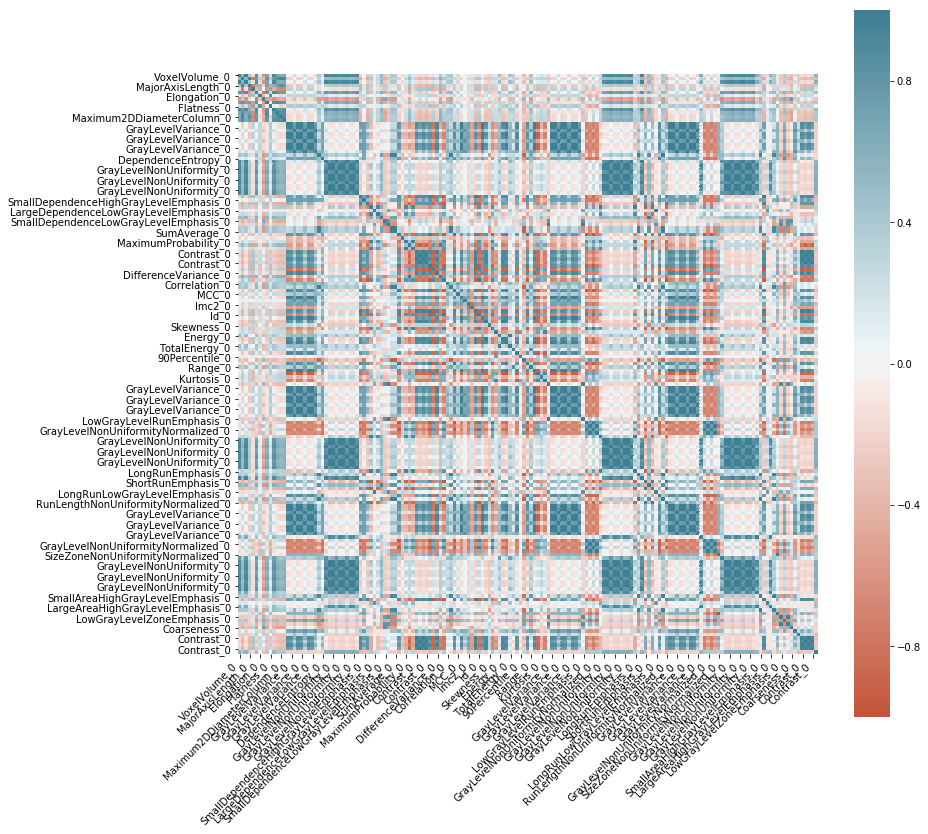

In [32]:
plt.figure(figsize=(13,13))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()